<a href="https://colab.research.google.com/github/Roshinigompa/Anamoly_Detection_Using_Robust_Graphical_Lasso/blob/main/Anamoly_Detection_RD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from scipy.linalg import eigh

In [ ]:
file_path=["/content/sample_data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv","/content/sample_data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv","/content/sample_data/Friday-WorkingHours-Morning.pcap_ISCX.csv","/content/sample_data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv","/content/sample_data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"]
data_frames = [pd.read_csv(file) for file in file_path]
df = pd.concat(data_frames, ignore_index=True)

In [ ]:
df.shape

(1162213, 79)

In [ ]:
df_missing=df.isnull().sum().sort_values(ascending=False)

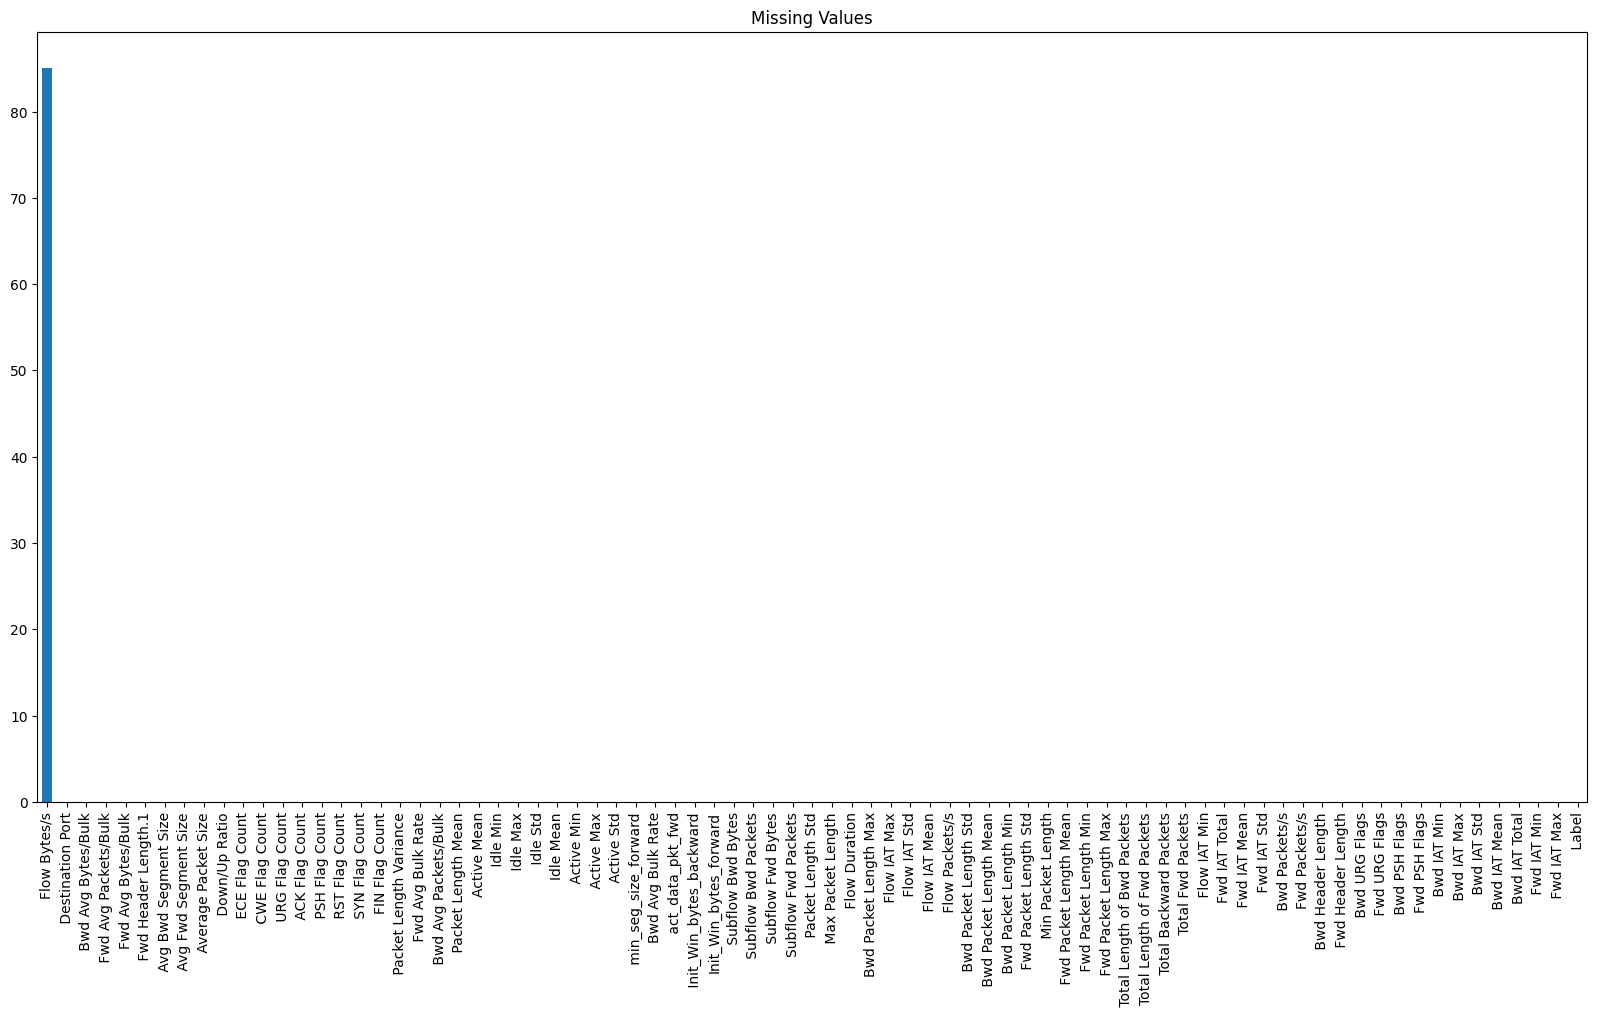

In [ ]:
plt.figure(figsize=(20,10))
df_missing.plot.bar()
plt.title('Missing Values')
plt.show()

In [ ]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in df.columns}
df.rename(columns = col_names, inplace = True)

In [ ]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
pd.options.display.max_columns = 80
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.000000e+06,666666.666700,3.000000,0.000000,3,3,3,3.000,0.0000,3,3,0,0.000000,0.000000,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,1.100917e+05,18348.623850,109.000000,0.000000,109,109,0,0.000,0.0000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,2.307692e+05,38461.538460,52.000000,0.000000,52,52,0,0.000,0.0000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.529412e+05,58823.529410,34.000000,0.000000,34,34,0,0.000,0.0000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.000000e+06,666666.666700,3.000000,0.000000,3,3,3,3.000,0.0000,3,3,0,0.000000,0.000000,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162208,55641,49,1,3,6,18,6,6,6.000000,0.000000,6,6,6.000000,0.000000,4.897959e+05,81632.653060,16.333333,24.846194,45,1,0,0.000,0.0000,0,0,4,2.000000,1.414214,3,1,0,0,0,0,20,60,20408.163270,61224.489800,6,6,6.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,3,7.500000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,3,18,0,0,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1162209,45337,217,2,1,31,6,31,0,15.500000,21.920310,6,6,6.000000,0.000000,1.705069e+05,13824.884790,108.500000,43.133514,139,78,217,217.000,0.0000,217,217,0,0.000000,0.000000,0,0,1,0,0,0,64,20,9216.589862,4608.294931,0,31,17.000000,16.350331,267.333333,0,1,0,0,1,0,0,0,0,22.666667,15.500000,6.000000,64,0,0,0,0,0,0,2,31,1,6,137,0,0,32,0.0,0

In [ ]:
dups = df[df.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 143521


In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(1018692, 79)

In [ ]:
missing_val = df.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    81
dtype: int64


In [ ]:
# Checking for infinity values
numeric_cols = df.select_dtypes(include = np.number).columns
inf_count = np.isinf(df[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      672
Flow Packets/s    753
dtype: int64


In [ ]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {df.isna().sum().sum()}')

df.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {df.isna().sum().sum()}')

Initial missing values: 81
Missing values after processing infinite values: 1506


In [ ]:
missing_val = df.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s      753
Flow Packets/s    753
dtype: int64


In [ ]:
# Calculating missing value percentage in the dataset
mis_per = (missing_val / len(df)) * 100
mis_table = pd.concat([missing_val, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s               753                        0.07
Flow Packets/s             753                        0.07


In [ ]:
med_flow_bytes = df['Flow Bytes/s'].median()
med_flow_packets = df['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  6484.083927
Median of Flow Packets/s:  84.94372478


In [ ]:
# Filling missing values with median
df['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
df['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

<ipython-input-20-55429364915c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
<ipython-input-20-55429364915c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
missing_val = df.isna().sum()
print(missing_val.loc[missing_val > 0])

Series([], dtype: int64)


In [ ]:
df.dropna(inplace = True)

In [ ]:
missing_val = df.isna().sum()
print(missing_val.loc[missing_val > 0])

Series([], dtype: int64)


In [ ]:
df['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection'], dtype=object)

In [ ]:
# Ensure no encoding issues replaces the character � (a common placeholder for encoding issues in text) with - in the Label column.
df['Label'] = df['Label'].str.replace('�', '-', regex=False)

In [ ]:
#Maps the Label values to broader attack categories based on the attack_map dictionary.
#Example: 'DoS Hulk' is mapped to 'DoS', and 'Web Attack - Brute Force' is mapped to 'Web Attack'.

attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack - Brute Force': 'Web Attack',
    'Web Attack - XSS': 'Web Attack',
    'Web Attack - Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Map labels and handle missing values
df['Attack Type'] = df['Label'].map(attack_map).fillna('Unknown')

In [ ]:
df['Attack Type'].value_counts()

,count
Attack Type,
BENIGN,795725
DDoS,128016
Port Scan,90819
Web Attack,2143
Bot,1953
Infiltration,36


In [ ]:
#Removes the Label column since its information has been mapped to the Attack Type column and is no longer needed.
df.drop('Label', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attack Number'] = le.fit_transform(df['Attack Type'])

print(df['Attack Number'].unique())

[0 2 4 1 3 5]


In [ ]:
# Printing corresponding attack type for each encoded value
encoded_values = df['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: DDoS
3: Infiltration
4: Port Scan
5: Web Attack


In [ ]:
corr = df.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 3)

In [ ]:
# Identify features with high correlation to the target
target_column = 'Attack Number'  # Replace with your target column name
target_correlations = corr[target_column].drop(target_column)  # Exclude target itself



In [ ]:
# Threshold for high correlation
high_corr_threshold = 0.5
low_corr_threshold = 0.1

# Features highly correlated with the target
strong_features = target_correlations[(target_correlations >= high_corr_threshold) |
                                      (target_correlations <= -high_corr_threshold)].index.tolist()

# Features weakly correlated with the target
weak_features = target_correlations[(target_correlations.abs() < low_corr_threshold)].index.tolist()

# Identify multicollinearity (features highly correlated with each other)
multicollinear_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:  # Threshold for multicollinearity
            pair = (corr.columns[i], corr.columns[j])
            multicollinear_pairs.append(pair)

# Print the results
print("Features strongly correlated with the target:", strong_features)
print("Features weakly correlated with the target:", weak_features)
print("Pairs of features with multicollinearity (correlation > 0.8):", multicollinear_pairs)

Features strongly correlated with the target: []
Features weakly correlated with the target: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Min', 'Fwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'FIN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
Pairs of features with multicollinearity (correlation > 0.8): [('Total Backward Packets', 'Total Fwd Pack

Remove Multicollinear Features:
For each pair of highly correlated features, retain one based on domain knowledge, feature importance, or variance (e.g., using Variance Inflation Factor (VIF)).

Use Feature Selection Techniques:
Use algorithms such as Recursive Feature Elimination (RFE), Lasso Regression, or Random Forest Feature Importance to identify valuable features.

Dimensionality Reduction:
If many weakly correlated features persist, apply dimensionality reduction techniques like PCA (Principal Component Analysis) to reduce feature space.

f the correlation map visually showed NaN values, but df.isna().sum() indicates there are no missing values, here are some considerations:

1. Possible Causes of NaN in Correlation Matrix
Constant Features: A feature with the same value across all rows will result in NaN when calculating correlation. This happens because the standard deviation of a constant feature is zero, leading to division by zero in correlation computation.

Low Variance Features: Features with very small variance might also cause numerical instability.

Numerical Precision Issues: Float precision errors might occasionally appear in the correlation matrix.

In [ ]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns.tolist())

Non-numeric columns: ['Attack Type']


In [ ]:
#Drop non-numeric to calculate variance
df_tocal_lowva=df.drop('Attack Type',axis=1)

In [ ]:
# Check for constant and low variance features
constant_features = [col for col in df_tocal_lowva.columns if df[col].nunique() == 1]
low_variance_features = [col for col in df_tocal_lowva.columns if df[col].std() < 1e-5]

# Drop constant and low variance features
features_to_drop = constant_features + low_variance_features
df = df.drop(columns=features_to_drop)
print(f"Dropped features: {features_to_drop}")


Dropped features: ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [ ]:
df.shape

(1018692, 72)

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['Attack Number'])  # Features
y = df['Attack Number']  # Target variable

In [ ]:
# Check data types in X
print(X.dtypes)

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns.tolist()
print(f"Non-numeric columns in features: {non_numeric_cols}")


Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Attack Type                     object
Length: 71, dtype: object
Non-numeric columns in features: ['Attack Type']


In [ ]:
# Verify label encoding
print(df[['Attack Type', 'Attack Number']].head())

# Drop the original non-numeric column if it still exists
if 'Attack Type' in df.columns:
    df = df.drop(columns=['Attack Type'])


  Attack Type  Attack Number
0      BENIGN              0
1      BENIGN              0
2      BENIGN              0
3      BENIGN              0
4      BENIGN              0


In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Number
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0


Top Features Based on Random Forest:
                   Feature    Importance
12  Bwd Packet Length Mean  5.856107e-02
13   Bwd Packet Length Std  5.517083e-02
40  Packet Length Variance  5.455097e-02
50     Average Packet Size  5.042596e-02
52    Avg Bwd Segment Size  4.483381e-02
..                     ...           ...
30           Fwd PSH Flags  3.386131e-06
31           Fwd URG Flags  1.481673e-06
47          CWE Flag Count  7.307738e-07
43          RST Flag Count  0.000000e+00
48          ECE Flag Count  0.000000e+00

[70 rows x 2 columns]


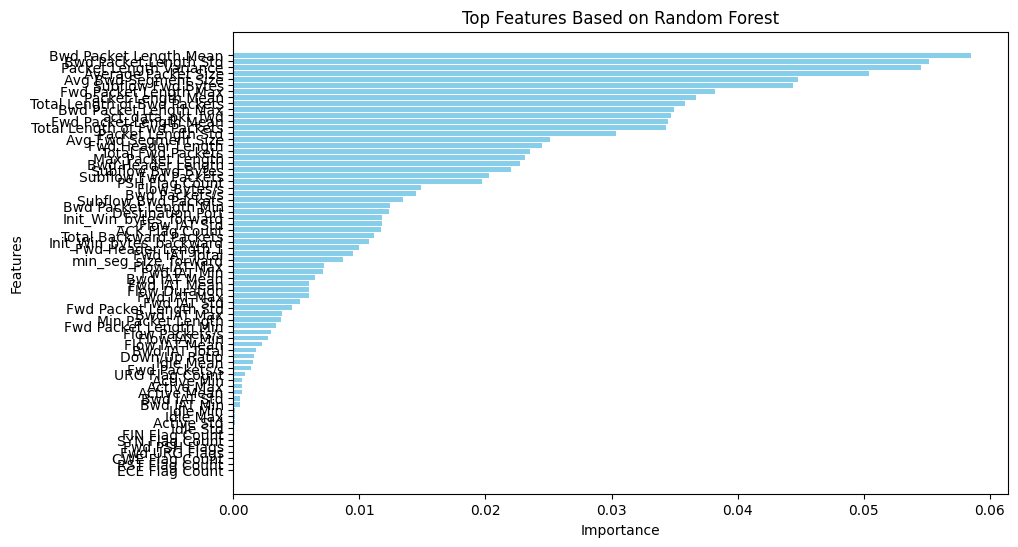

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target (y)
X = df.drop(columns=['Attack Number'])  # Features
y = df['Attack Number']  # Target variable

# Ensure X contains only numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns.tolist()
if non_numeric_cols:
    raise ValueError(f"Non-numeric columns present in features: {non_numeric_cols}")

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Extract Feature Importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display Top Features
print("Top Features Based on Random Forest:")
print(feature_importances)

# Visualize Feature Importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top Features Based on Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Optimized Top Features Based on Random Forest:
                        Feature  Importance
12  Total Length of Fwd Packets    0.084830
2        Packet Length Variance    0.079489
6         Fwd Packet Length Max    0.069119
16            Total Fwd Packets    0.066830
5             Subflow Fwd Bytes    0.060313
3           Average Packet Size    0.046107
9         Bwd Packet Length Max    0.045555
4          Avg Bwd Segment Size    0.043754
14         Avg Fwd Segment Size    0.041316
7            Packet Length Mean    0.039872
22                 Flow Bytes/s    0.038857
1         Bwd Packet Length Std    0.034893
28                 Flow IAT Std    0.034465
11       Fwd Packet Length Mean    0.032655
13            Packet Length Std    0.031502
0        Bwd Packet Length Mean    0.026051
10             act_data_pkt_fwd    0.025211
25        Bwd Packet Length Min    0.024055
21               PSH Flag Count    0.021382
8   Total Length of Bwd Packets    0.021248
27       Init_Win_bytes_forwa

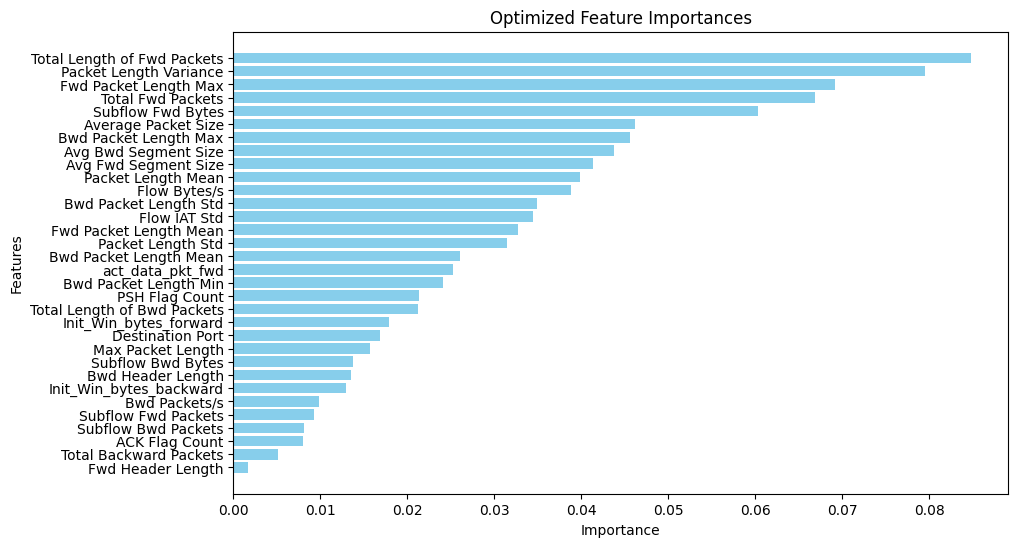

In [ ]:
# Step 1: Identify Significant Features
importance_threshold = 0.01
significant_features = feature_importances[feature_importances['Importance'] > importance_threshold]['Feature']

# Step 2: Filter Features
X_significant = X[significant_features]

# Step 3: Train Optimized Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=25, n_jobs=-1)
rf.fit(X_significant, y)

# Step 4: Extract Feature Importances
importances = rf.feature_importances_
optimized_importances = pd.DataFrame({'Feature': X_significant.columns, 'Importance': importances})
optimized_importances = optimized_importances.sort_values(by='Importance', ascending=False)

# Display Top Features
print("Optimized Top Features Based on Random Forest:")
print(optimized_importances)

# Visualize Optimized Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(optimized_importances['Feature'], optimized_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Optimized Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
# Ensure 'df' is processed as per your preprocessing steps
#processed_df = df.copy()  # Save processed DataFrame


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.covariance import MinCovDet
from scipy.linalg import svd
import os
import networkx as nx

In [ ]:
def save_intermediate_results(df, X_scaled):
    # Save DataFrame and scaled features
    df.to_csv("processed_dataset.csv", index=False)
    np.save("X_scaled.npy", X_scaled)
    print("Processed dataset and scaled features saved.")


In [ ]:
def load_intermediate_results():
    # Load previously saved data
    if os.path.exists("processed_dataset.csv") and os.path.exists("X_scaled.npy"):
        df = pd.read_csv("processed_dataset.csv")
        X_scaled = np.load("X_scaled.npy")
        print("Processed dataset and scaled features loaded.")
        return df, X_scaled
    else:
        raise FileNotFoundError("Processed data not found. Please ensure preprocessing is complete.")


In [ ]:
try:
    df, X_scaled = load_intermediate_results()
except FileNotFoundError:
    print("Processed data not found. Recomputing scaling...")
    # If processed data is missing, recompute
    optimized_features = [
        'Total Length of Fwd Packets', 'Packet Length Variance', 'Fwd Packet Length Max',
        'Total Fwd Packets', 'Subflow Fwd Bytes', 'Average Packet Size', 'Bwd Packet Length Max',
        'Avg Bwd Segment Size', 'Avg Fwd Segment Size', 'Packet Length Mean', 'Flow Bytes/s'
    ]
    X_optimized = df[optimized_features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_optimized)
    save_intermediate_results(df, X_scaled)  # Save after recomputing


Processed dataset and scaled features loaded.


In [ ]:
# Verify scaled data
mean = X_scaled.mean(axis=0)
std_dev = X_scaled.std(axis=0)
print("Mean of scaled features (should be close to 0):", mean)
print("Std deviation of scaled features (should be close to 1):", std_dev)


Mean of scaled features (should be close to 0): [-4.26349915e-18  3.63595392e-16  4.28547055e-17  1.33572202e-18
 -6.52341526e-18  2.54673016e-16 -6.67372758e-17 -7.83437585e-17
 -4.14875958e-17 -9.55302811e-17 -1.01556724e-17]
Std deviation of scaled features (should be close to 1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
class EnhancedRobustGlasso:
    def __init__(self, pho=0.005, lambda_=0.005, max_iter=1500, epsilon=1e-7):
        self.pho = pho
        self.lambda_ = lambda_
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.theta = None  # Precision Matrix
        self.S = None      # Sparse Anomalies Matrix
        self.L = None      # Cleaned Covariance Matrix

    def fit(self, data):
        if isinstance(data, pd.DataFrame):
            data = data.values

        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)

        M = np.cov(data_scaled, rowvar=False) + np.eye(data_scaled.shape[1]) * 1e-5
        n = M.shape[0]

        theta_ = np.eye(n) * 0.01
        L = np.eye(n) * 0.001
        S = np.zeros((n, n))

        U_1, U_2, Z = np.zeros((n, n)), np.zeros((n, n)), np.zeros((n, n))

        for iteration in range(self.max_iter):
            residual = M - S + U_2 / 0.05
            residual += np.eye(residual.shape[0]) * 1e-6
            residual = (residual + residual.T) / 2
            eigval, eigvec = np.linalg.eigh(residual)
            eigval = np.clip(eigval, a_min=1e-6, a_max=1e6)
            theta_ = eigvec @ np.diag(1 / eigval) @ eigvec.T

            Z = np.sign(theta_ + U_1) * np.maximum(np.abs(theta_ + U_1) - self.pho / 0.05, 0)
            residual = M - S + U_2 / 0.05
            residual = (residual + residual.T) / 2
            eigvals, eigvecs = np.linalg.eigh(residual)
            eigvals = np.maximum(eigvals, 0)
            L = eigvecs @ np.diag(eigvals) @ eigvecs.T

            residual = M - L + U_2 / 0.05
            S = np.sign(residual) * np.maximum(np.abs(residual) - self.lambda_, 0)
            S = (S + S.T) / 2
            S = np.clip(S, a_min=-1e3, a_max=1e3)

            U_1 += theta_ - Z
            U_2 += M - L - S

            primal_residual = np.linalg.norm(M - L - S, ord='fro')
            dual_residual = np.linalg.norm(theta_ - Z, ord='fro')

            if primal_residual < self.epsilon and dual_residual < self.epsilon:
                print(f"Converged at iteration {iteration}")
                break

        self.theta, self.S, self.L = theta_, S, L
        return self

    def plot_components(self, feature_names=None):
        if feature_names is None or len(feature_names) != self.theta.shape[0]:
            feature_names = [f'Feature {i}' for i in range(self.theta.shape[0])]

        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        sns.heatmap(self.theta, ax=axes[0], cmap='coolwarm', center=0,
                    xticklabels=feature_names, yticklabels=feature_names)
        axes[0].set_title('Precision Matrix (Theta)')
        sns.heatmap(self.S, ax=axes[1], cmap='coolwarm', center=0,
                    xticklabels=feature_names, yticklabels=feature_names)
        axes[1].set_title('Sparse Component (S)')
        sns.heatmap(self.L, ax=axes[2], cmap='coolwarm', center=0,
                    xticklabels=feature_names, yticklabels=feature_names)
        axes[2].set_title('Clean Component (L)')
        plt.tight_layout()
        plt.show()

    def plot_network(self, feature_names=None, threshold=0.1):
        if feature_names is None:
            feature_names = [f'Feature {i}' for i in range(self.theta.shape[0])]

        G = nx.Graph()
        n = self.theta.shape[0]

        for i in range(n):
            G.add_node(feature_names[i])

        for i in range(n):
            for j in range(i + 1, n):
                if abs(self.theta[i, j]) > threshold:
                    G.add_edge(feature_names[i], feature_names[j],
                               weight=abs(self.theta[i, j]))

        pos = nx.spring_layout(G, seed=42, k=0.3)
        plt.figure(figsize=(15, 15))
        nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue', alpha=0.9)
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
        nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7)
        plt.title('Improved Network Representation of Dependencies')
        plt.axis('off')
        plt.show()


In [ ]:
model = EnhancedRobustGlasso(pho=0.005, lambda_=0.005)
model.fit(X_scaled)

# Compute anomaly scores
anomaly_scores_glasso = np.sum(np.abs(X_scaled @ model.S), axis=1)
threshold_glasso = np.percentile(anomaly_scores_glasso, 95)
anomalies_glasso = (anomaly_scores_glasso > threshold_glasso).astype(int)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred, method):
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    print(f"{method} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")
    return precision, recall, f1


In [ ]:
y_true = df['Attack Number']  # Define target variable
precision_glasso, recall_glasso, f1_glasso = calculate_metrics(y_true, anomalies_glasso, "Enhanced Robust Glasso")


Enhanced Robust Glasso - Precision: 0.84, Recall: 0.76, F1: 0.69


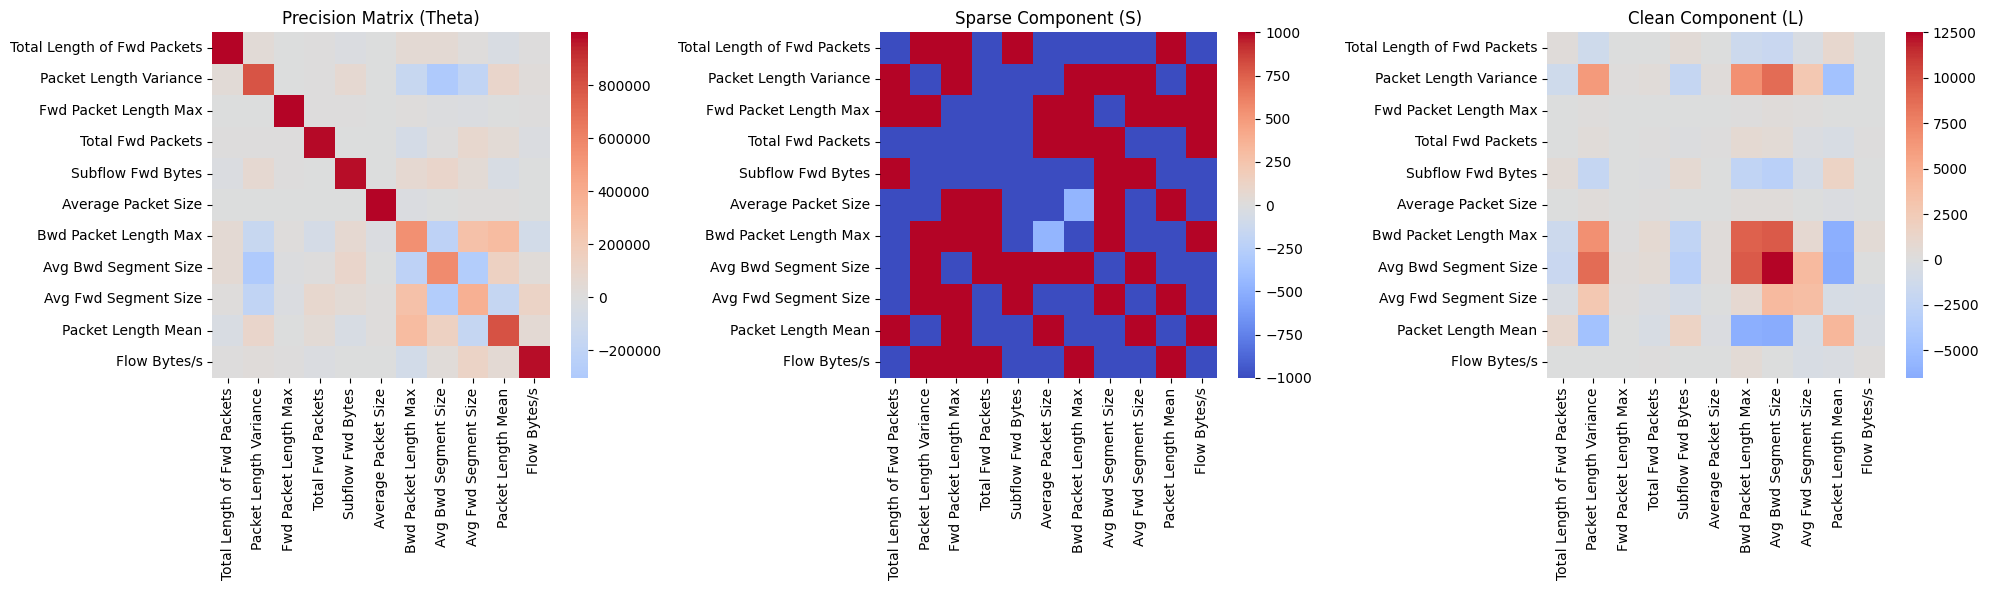

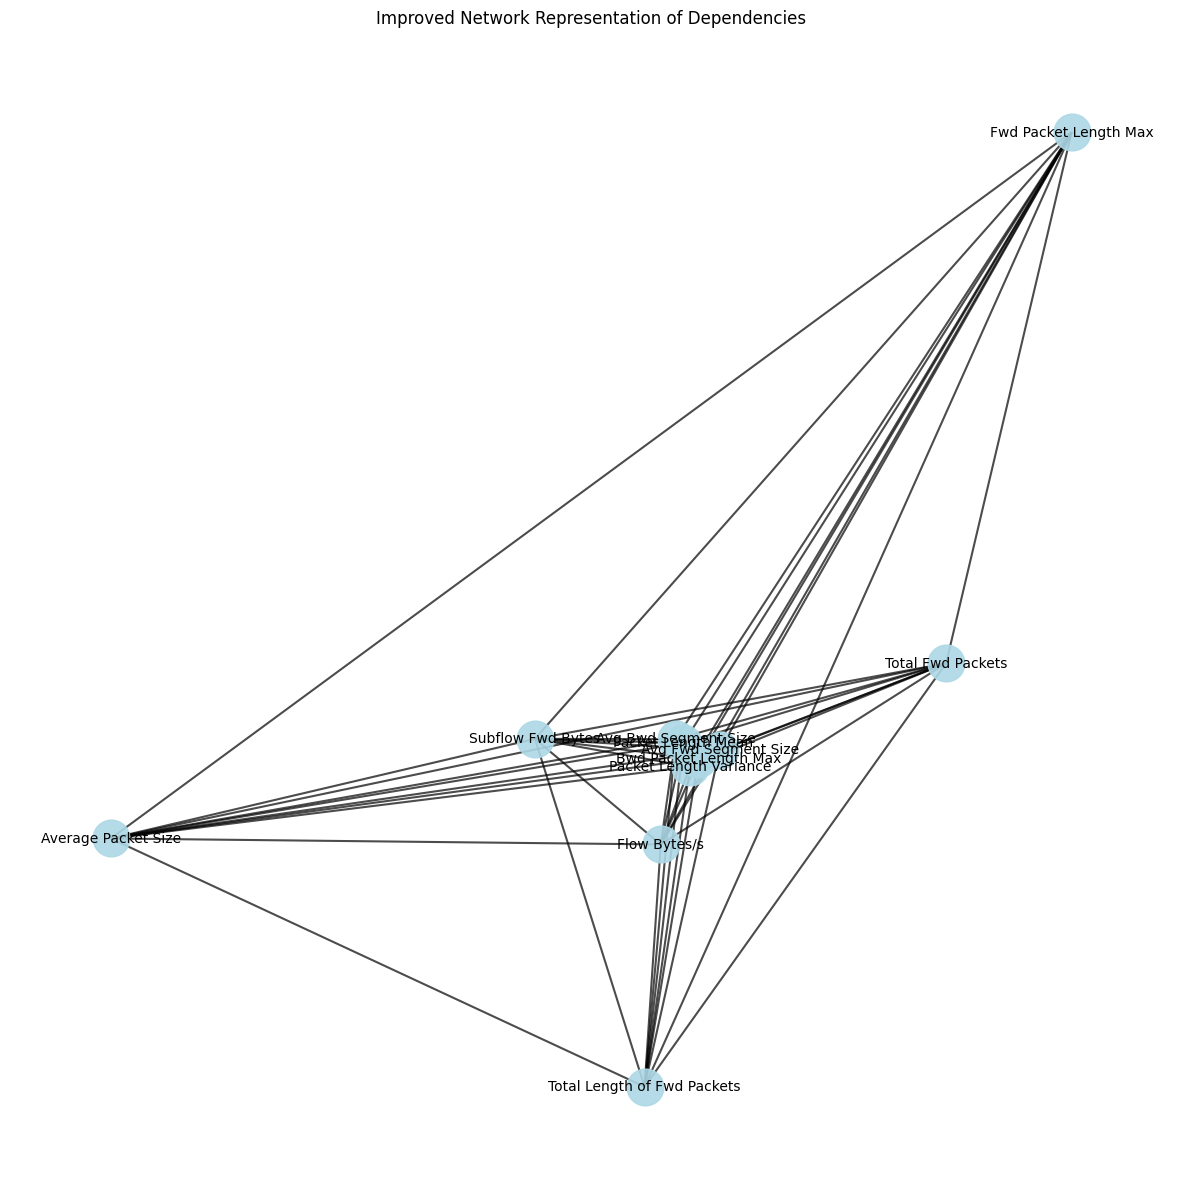

In [ ]:
# Plot Components
feature_names = [
    'Total Length of Fwd Packets', 'Packet Length Variance', 'Fwd Packet Length Max',
    'Total Fwd Packets', 'Subflow Fwd Bytes', 'Average Packet Size', 'Bwd Packet Length Max',
    'Avg Bwd Segment Size', 'Avg Fwd Segment Size', 'Packet Length Mean', 'Flow Bytes/s'
]
model.plot_components(feature_names=feature_names)

# Plot Network
model.plot_network(feature_names=feature_names, threshold=0.1)


In [ ]:
optimized_features = [
        'Total Length of Fwd Packets', 'Packet Length Variance', 'Fwd Packet Length Max',
        'Total Fwd Packets', 'Subflow Fwd Bytes', 'Average Packet Size', 'Bwd Packet Length Max',
        'Avg Bwd Segment Size', 'Avg Fwd Segment Size', 'Packet Length Mean', 'Flow Bytes/s'
    ]

In [ ]:
import numpy as np
from scipy.linalg import inv
from sklearn.metrics import precision_score, recall_score, f1_score

# MCD Implementation
def robust_mcd(data, contamination=0.1):
    """Perform MCD to compute a robust covariance matrix and detect anomalies."""
    n_samples = data.shape[0]
    subset_size = int((1 - contamination) * n_samples)

    # Initialize variables for the best subset
    best_cov = None
    best_mean = None
    smallest_det = float('inf')

    # Randomly sample subsets and compute covariance
    for _ in range(100):  # Randomized selection of subsets
        subset = data[np.random.choice(n_samples, subset_size, replace=False)]
        mean = np.mean(subset, axis=0)
        cov = np.cov(subset, rowvar=False)

        # Regularize covariance matrix for stability
        cov += np.eye(cov.shape[0]) * 1e-6  # Add small value to diagonal

        # Calculate determinant of covariance matrix
        det = np.linalg.det(cov)
        if det < smallest_det:
            smallest_det = det
            best_cov = cov
            best_mean = mean

    # Compute Mahalanobis distances
    centered_data = data - best_mean
    inv_cov = inv(best_cov)
    mahalanobis_distances = np.sqrt(np.sum(centered_data @ inv_cov * centered_data, axis=1))

    return mahalanobis_distances, best_cov, best_mean

# Ensure `df` and `optimized_features` exist
try:
    assert 'df' in locals(), "DataFrame `df` is not defined. Please define and preprocess it first."
    assert 'optimized_features' in locals(), "`optimized_features` is not defined. Please define it."
    data_array = df[optimized_features].to_numpy()
    y_true = df['Attack Number']  # Ground truth labels (encoded)
    print("Feature selection successful!")
except AssertionError as e:
    raise ValueError(e)

# Apply MCD
print("Applying MCD...")
mcd_distances, _, _ = robust_mcd(data_array)

# Predicted anomalies based on Mahalanobis distances
mcd_threshold = np.percentile(mcd_distances, 90)  # Top 10% as anomalies
mcd_predicted_labels = (mcd_distances > mcd_threshold).astype(int)

# Metrics for MCD
mcd_precision = precision_score(y_true, mcd_predicted_labels, average='weighted', zero_division=1)
mcd_recall = recall_score(y_true, mcd_predicted_labels, average='weighted', zero_division=1)
mcd_f1 = f1_score(y_true, mcd_predicted_labels, average='weighted', zero_division=1)

print("Metrics for MCD:")
print(f"Precision: {mcd_precision:.2f}")
print(f"Recall: {mcd_recall:.2f}")
print(f"F1 Score: {mcd_f1:.2f}")


Feature selection successful!
Applying MCD...
Metrics for MCD:
Precision: 0.86
Recall: 0.74
F1 Score: 0.68


In [ ]:
from scipy.linalg import svd
from sklearn.metrics import precision_score, recall_score, f1_score

# RPCA Implementation
def robust_pca(data, contamination=0.1):
    """Perform Robust PCA using SVD."""
    # Decompose data matrix using SVD
    U, sigma, VT = svd(data, full_matrices=False)

    # Reconstruct the low-rank approximation
    rank = int((1 - contamination) * len(sigma))  # Retain (1 - contamination) fraction of singular values
    sigma[rank:] = 0  # Zero-out small singular values
    L = U @ np.diag(sigma) @ VT  # Low-rank approximation

    # Sparse matrix is the residual
    S = data - L
    return L, S

# Ensure `df` and `optimized_features` exist
try:
    assert 'df' in locals(), "DataFrame `df` is not defined. Please define and preprocess it first."
    assert 'optimized_features' in locals(), "`optimized_features` is not defined. Please define it."
    data_array = df[optimized_features].to_numpy()
    y_true = df['Attack Number']  # Ground truth labels (encoded)
    print("Feature selection successful!")
except AssertionError as e:
    raise ValueError(e)

# Apply RPCA
print("Applying RPCA...")
L_rpca, S_rpca = robust_pca(data_array)

# Predicted anomalies based on sparse matrix
rpca_anomaly_scores = np.linalg.norm(S_rpca, axis=1)
rpca_threshold = np.percentile(rpca_anomaly_scores, 90)  # Top 10% as anomalies
rpca_predicted_labels = (rpca_anomaly_scores > rpca_threshold).astype(int)

# Metrics for RPCA
rpca_precision = precision_score(y_true, rpca_predicted_labels, average='weighted', zero_division=1)
rpca_recall = recall_score(y_true, rpca_predicted_labels, average='weighted', zero_division=1)
rpca_f1 = f1_score(y_true, rpca_predicted_labels, average='weighted', zero_division=1)

print("Metrics for RPCA:")
print(f"Precision: {rpca_precision:.2f}")
print(f"Recall: {rpca_recall:.2f}")
print(f"F1 Score: {rpca_f1:.2f}")


Feature selection successful!
Applying RPCA...
Metrics for RPCA:
Precision: 0.81
Recall: 0.68
F1 Score: 0.64


Model Comparison:
                   Model  Precision    Recall  F1-Score
0  Enhanced Robust Lasso   0.842510  0.760834  0.686577
1                    MCD   0.856040  0.736382  0.684272
2                   RPCA   0.810587  0.684011  0.635605


<Figure size 1200x600 with 0 Axes>

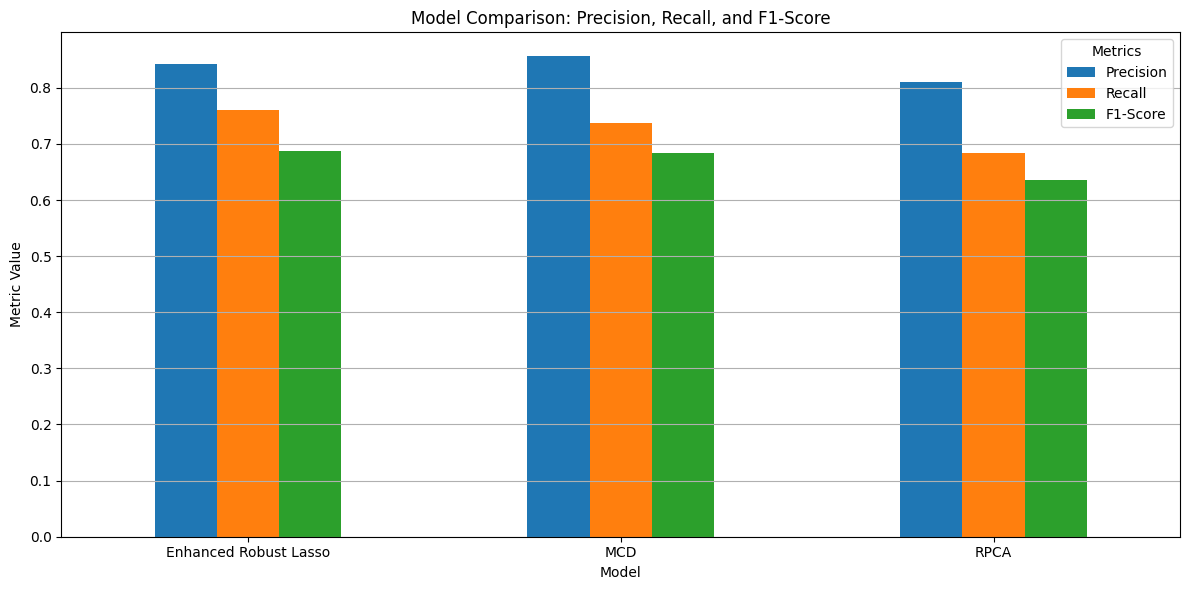

In [ ]:
# Consolidate all metrics into a single DataFrame for comparison
comparison_metrics = {
    "Model": ["Enhanced Robust Lasso", "MCD", "RPCA"],
    "Precision": [precision_glasso, mcd_precision, rpca_precision],
    "Recall": [recall_glasso, mcd_recall, rpca_recall],
    "F1-Score": [f1_glasso, mcd_f1, rpca_f1]
}

comparison_df = pd.DataFrame(comparison_metrics)

# Display comparison table
print("Model Comparison:")
print(comparison_df)

# Plot comparison metrics
plt.figure(figsize=(12, 6))
comparison_df.set_index("Model").plot(kind="bar", figsize=(12, 6))
plt.title("Model Comparison: Precision, Recall, and F1-Score")
plt.ylabel("Metric Value")
plt.xlabel("Model")
plt.legend(title="Metrics")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


The comparison shows that Enhanced Robust Lasso (ERL) has the best recall (0.76), capturing the most true anomalies, making it ideal for scenarios like fraud detection. MCD achieves the highest precision (0.85), minimizing false positives, suitable for critical tasks like medical anomaly detection. RPCA performs reasonably but has the lowest F1-score (0.63), making it less balanced for anomaly detection. For high recall needs, use ERL, and for high precision, prefer MCD. RPCA works well for initial exploration or dimensionality reduction tasks.